In [1]:
import pandas as pd
import numpy as np

In [2]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


In [4]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [5]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']

In [10]:
df_final.head(2)

,Open,Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,6 day before Close,6 day before Volume,6 day before Adj Close,7 day before Open,7 day before High,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0.933579,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,-0.5574,-0.0516,0.5719,-0.8658,-0.296,-0.4404,-0.3182,0.5612,-0.7351,-0.2732,-0.8402,-0.6486,-0.4767,0.1779,-0.1027,-0.5859,0.3818,0,-0.4019,-0.3182,-0.9509,-0.3818,-0.9618,-0.9432,0
1,0.897638,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,0.90964,-0.756853,0.90964,0.917109,0.918651,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,0,-0.4141,0.4019,-0.8934,-0.6124,-0.91,-0.3612,0.7003,-0.8402,-0.7096,0.6705,0.4019,-0.5423,0,-0.3182,0.7351,0,-0.7579,-0.3182,0,-0.9578,0,-0.872,-0.5423,-0.875


In [58]:
train_size = X_df.shape[0]*0.8
test_size = X_df.shape[0]*0.2

In [119]:
x_train, x_test, y_train, y_test = (X_df.tail(int(train_size)), X_df.head(int(test_size)), Y_df.tail(int(train_size)), Y_df.head(int(test_size)))
# x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

In [120]:
data_x_train = x_train
data_y_train = np.array(y_train, ndmin=2).reshape((y_train.shape[0], 1))
data_x_test = x_test
data_y_test = np.array(y_test, ndmin=2).reshape((y_test.shape[0], 1))

In [121]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [122]:
features = x_train.shape[1]

In [123]:
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [124]:
train_losses = []
test_losses = []
temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
print('iter:', 0,', loss:', temp_loss)
for i in range(50):
    sess.run(update, feed_dict = {x:data_x_train, y_:data_y_train})
  
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)

iter: 0 , loss: 0.69259554
iter: 1 , loss: 0.5693804
iter: 2 , loss: 0.46815124
iter: 3 , loss: 0.38500115
iter: 4 , loss: 0.31671622
iter: 5 , loss: 0.2606526
iter: 6 , loss: 0.21463558
iter: 7 , loss: 0.17687632
iter: 8 , loss: 0.14590365
iter: 9 , loss: 0.120507486
iter: 10 , loss: 0.0996927
iter: 11 , loss: 0.08264105
iter: 12 , loss: 0.06867967
iter: 13 , loss: 0.05725539
iter: 14 , loss: 0.04791343
iter: 15 , loss: 0.040280037
iter: 16 , loss: 0.034047984
iter: 17 , loss: 0.028964851
iter: 18 , loss: 0.024823263
iter: 19 , loss: 0.02145286
iter: 20 , loss: 0.018713763
iter: 21 , loss: 0.016491115
iter: 22 , loss: 0.014690673
iter: 23 , loss: 0.013235079
iter: 24 , loss: 0.012060927
iter: 25 , loss: 0.01111619
iter: 26 , loss: 0.010358263
iter: 27 , loss: 0.009752243
iter: 28 , loss: 0.009269563
iter: 29 , loss: 0.008886845
iter: 30 , loss: 0.008584987
iter: 31 , loss: 0.008348394
iter: 32 , loss: 0.008164333
iter: 33 , loss: 0.008022424
iter: 34 , loss: 0.007914226
iter: 35 , los

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

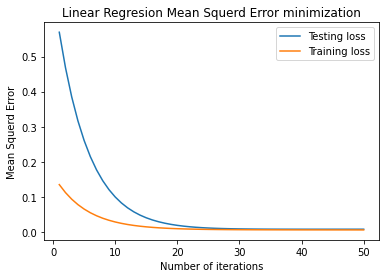

In [126]:
iter = np.arange(1,len(test_losses)+1)
plt.title('Linear Regresion Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

In [127]:
sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})

0.007696695

In [175]:
train_size = X_df.shape[0]*0.8
test_size = X_df.shape[0]*0.2

In [176]:
x_train, x_test, y_train, y_test = (X_df.tail(int(train_size)), X_df.head(int(test_size)), Y_df.tail(int(train_size)), Y_df.head(int(test_size)))
# x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

In [177]:
data_x_train = x_train
data_y_train = np.array(y_train, ndmin=2).reshape((y_train.shape[0], 1))
data_x_test = x_test
data_y_test = np.array(y_test, ndmin=2).reshape((y_test.shape[0], 1))

In [178]:
train_size = x_train.shape[0]
print(train_size)
test_size = x_test.shape[0]
print(test_size)

1544
386


In [179]:
step_size = 0.02
(hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (350, 1, 1, 1, 1 )
# (hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (300, 50, 1, 1, 1 )
# (hidden1_size, hidden2_size, hidden3_size, hidden4_size, hidden5_size) = (1228, 1228, 612, 1, 1 )

In [180]:
for _ in [1,2]:
  minVal=-0.0001
  maxVal=0.0001

  x = tf.placeholder(tf.float32, shape=[None, x_train.shape[1]])
  y_ = tf.placeholder(tf.float32, shape=[None, 1])

  W1 = tf.Variable(tf.random.uniform(shape=[x_train.shape[1], hidden1_size], minval=minVal, maxval=maxVal))
  b1 = tf.Variable(tf.random.uniform(shape=[hidden1_size], minval=minVal, maxval=maxVal))
  z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

  W2 = tf.Variable(tf.random.uniform([hidden1_size, hidden2_size], minval=minVal, maxval=maxVal))
  b2 = tf.Variable(tf.random.uniform(shape=[hidden2_size], minval=minVal, maxval=maxVal))
  # z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

  # W3 = tf.Variable(tf.random.uniform([hidden2_size, hidden3_size], minval=minVal, maxval=maxVal))
  # b3 = tf.Variable(tf.random.uniform(shape=[hidden3_size], minval=minVal, maxval=maxVal))
  # z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

  # W4 = tf.Variable(tf.random.uniform([hidden3_size, hidden4_size], minval=minVal, maxval=maxVal))
  # b4 = tf.Variable(tf.random.uniform(shape=[hidden4_size], minval=minVal, maxval=maxVal))
  # z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

  # W5 = tf.Variable(tf.random.uniform([hidden4_size, hidden5_size], minval=minVal, maxval=maxVal))
  # b5 = tf.Variable(tf.random.uniform(shape=[hidden5_size], minval=minVal, maxval=maxVal))
  # z5 = tf.nn.relu(tf.matmul(z4,W5)+b5)

  # W6 = tf.Variable(tf.random.uniform([hidden5_size, 1], minval=minVal, maxval=maxVal))
  # b6 = tf.Variable(tf.random.uniform(shape=[1], minval=minVal, maxval=maxVal))

  predict = tf.matmul(z1,W2) + b2
  # predict = tf.matmul(z5,W6) + b6
  # predict = tf.matmul(z4,W5) + b5
  # predict = tf.matmul(z5,W6) + b6

  loss = tf.reduce_mean(tf.pow(predict - y_, 2))
  train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

  init = tf.global_variables_initializer()
  sess = tf.Session()
  train_losses = []
  test_losses = []
  sess.run(init)

In [181]:
for i in range (200):
    for _ in range(10):
      sess.run(train_step, feed_dict={x:data_x_train, y_:data_y_train})
  
    temp_loss = sess.run(loss, feed_dict = {x: data_x_train, y_: data_y_train})
    train_losses.append(temp_loss)
    temp_loss = sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})
    test_losses.append(temp_loss)
    print('iter:', i+1,', loss:', temp_loss)

iter: 1 , loss: 0.7341919
iter: 2 , loss: 0.72488064
iter: 3 , loss: 0.71795106
iter: 4 , loss: 0.709353
iter: 5 , loss: 0.68345135
iter: 6 , loss: 0.5771836
iter: 7 , loss: 0.28673765
iter: 8 , loss: 0.052480258
iter: 9 , loss: 0.013283063
iter: 10 , loss: 0.010290763
iter: 11 , loss: 0.010304177
iter: 12 , loss: 0.010331272
iter: 13 , loss: 0.010236037
iter: 14 , loss: 0.010120715
iter: 15 , loss: 0.010023565
iter: 16 , loss: 0.00994664
iter: 17 , loss: 0.009884832
iter: 18 , loss: 0.009833475
iter: 19 , loss: 0.009789525
iter: 20 , loss: 0.009751356
iter: 21 , loss: 0.00971764
iter: 22 , loss: 0.009687167
iter: 23 , loss: 0.009659541
iter: 24 , loss: 0.009634364
iter: 25 , loss: 0.009611102
iter: 26 , loss: 0.009589732
iter: 27 , loss: 0.009570206
iter: 28 , loss: 0.009551932
iter: 29 , loss: 0.009534866
iter: 30 , loss: 0.009518936
iter: 31 , loss: 0.009503831
iter: 32 , loss: 0.009489723
iter: 33 , loss: 0.009476452
iter: 34 , loss: 0.0094631575
iter: 35 , loss: 0.009449914
iter: 

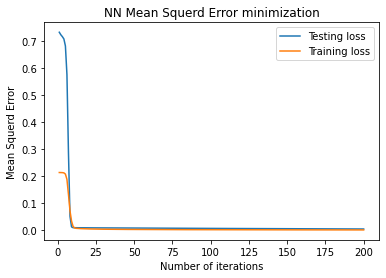

In [182]:
iter = np.arange(1,len(test_losses)+1)
plt.title('NN Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()

In [183]:
sess.run(loss, feed_dict = {x: data_x_test, y_: data_y_test})

0.0054396293